# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will apply machine learning to build a multi-class classification model to predict the type of `"crop"`, while using techniques to avoid multicollinearity, which is a concept where two or more features are highly correlated.

In [194]:
# All required libraries are imported here for you.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import f1_score

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here
crops.head()

,N,P,K,ph,crop
0,90,42,43,6.502985,rice
1,85,58,41,7.038096,rice
2,60,55,44,7.840207,rice
3,74,35,40,6.980401,rice
4,78,42,42,7.628473,rice


In [195]:
crops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB


As the output suggests, we are dealing with 2200 data with 5 features in which one of the column("crop") is the target variable. The "target variable" has the categories we want to predict. This makes the problem a Supervised Classification Problem where for the predictions with linear model, we need to work with the Logistic regression classifier.

In the next cell, we see the unique values that the target varibale contains.

In [196]:
print(crops['crop'].nunique())
print(crops['crop'].unique())

22
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [197]:
crops.describe()

,N,P,K,ph
count,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,6.469480
std,36.917334,32.985883,50.647931,0.773938
min,0.000000,5.000000,5.000000,3.504752
25%,21.000000,28.000000,20.000000,5.971693
50%,37.000000,51.000000,32.000000,6.425045
75%,84.250000,68.000000,49.000000,6.923643
max,140.000000,145.000000,205.000000,9.935091


In [198]:
crops.isna().sum().sort_values(ascending=True)

N       0
P       0
K       0
ph      0
crop    0
dtype: int64

There are no missing values. Columns need to be normalize as their ranges are different. This helps us to achieve a better trained model (We don't do this normalization here).

**Next:** In the next cell we want to split the data into training and test sets, setting test_size equal to 20% and using a random_state of 42.

In [199]:
X = crops.drop('crop', axis=1)
y = crops['crop']

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=42)  ## stratify=y

**Next:** Predict the "crop" type using each feature individually by looping over all the features, and, for each feature, fit a Logistic Regression model and calculate f1_score(). When creating the model, set max_iter to 2000 so the model can converge, and pass an appropriate string value to the multi_class keyword argument.



#### More about "multiclass" argument of the LogisticRegression"
In scikit-learn's `LogisticRegression` model, the `multi_class` argument specifies the strategy for handling multiclass classification problems. When you set `multi_class='auto'`, scikit-learn automatically chooses the strategy based on the nature of the problem and the data provided.

Here's what `multi_class` argument options mean:

- **'ovr'**: This stands for "One-vs-Rest". In this strategy, a binary classification problem is created for each class, where one class is treated as the positive class and the rest are treated as the negative class. This strategy is suitable for binary and multiclass classification problems. However, it may not be suitable for datasets with imbalanced class distributions.
  
- **'multinomial'**: This is also known as the "multinomial" logistic regression. In this strategy, the model directly optimizes the multinomial logistic loss across all the classes. This strategy is suitable for multiclass classification problems.

- **'auto'**: This option lets scikit-learn choose the appropriate strategy based on the nature of the problem. It generally uses the 'ovr' strategy for binary classification problems and 'multinomial' for multiclass classification problems.

In the context of your provided code snippet:

```python
LogisticRegression(max_iter=2000, multi_class='auto')
```

Setting `multi_class='auto'` allows scikit-learn to automatically choose the appropriate multiclass strategy based on the problem you're solving. This is a convenient option when you're not sure which strategy is best suited for your particular dataset and classification task.

In [200]:
# Loop over each feature
for feature_name in list(X.columns):
    # # Select the feature
    # X_train_feature = X_train[feature_name].values.reshape(-1, 1)  ## When dealing with one column, we need to take care of the dimensions 
    # X_test_feature = X_test[feature_name].values.reshape(-1, 1)
    
    # Split the dataset with the selected feature
    # X_train_feature, X_test_feature = train_test_split(X_feature, test_size=0.3, random_state=42)
    
    # Create and fit the Logistic Regression model
    model = LogisticRegression(max_iter=2000, multi_class='multinomial')
    model.fit(X_train[[feature_name]], y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test[[feature_name]])
    
    # Calculate the F1 score
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"F1 score using feature {feature_name}: {f1}")

F1 score using feature N: 0.10507916708090527
F1 score using feature P: 0.10457380486654515
F1 score using feature K: 0.2007873036107074
F1 score using feature ph: 0.04532731061152114


#### F1-Score
The F1 score is a metric commonly used in binary classification problems to evaluate the model's performance. However, it can also be extended to multiclass classification problems by calculating the F1 score for each class individually and then averaging them. The F1 score combines both precision and recall into a single metric, making it a balanced measure that considers both false positives and false negatives.

Here's a breakdown of the output:

- **F1 score using feature N: 0.12221912814270404**: This indicates that when using feature N, the F1 score achieved by the logistic regression model is approximately 0.12. This means that the model's performance is **relatively poor** when considering feature N.

- **F1 score using feature P: 0.1681796557631306**: Similarly, when using feature P, the F1 score achieved by the logistic regression model is approximately 0.17. Again, this suggests that the model's performance is **not very strong** when considering feature P.

- **F1 score using feature K: 0.2691443992676175**: With feature K, the F1 score is around 0.27. This indicates relatively **better performance compared to features N and P**, but it still may not be satisfactory depending on the context.

- **F1 score using feature ph: 0.07481616268017899**: The F1 score is particularly low for feature ph, at around 0.07. This suggests that the model's performance is **significantly poor** when considering feature ph.

From these F1 scores, we can infer that the model's performance varies depending on the features used. Some features contribute more to the model's ability to make accurate predictions, while others seem to be less informative or more challenging for the model to utilize effectively.

In summary, F1 scores provide insights into the model's ability to balance precision and recall, with higher scores indicating better performance and lower scores indicating poorer performance.

**Next:** In order to avoid selecting two features that are highly correlated, perform a correlation analysis for each pair of features, enabling you to build a final model without the presence of multicollinearity.

**To do SO**

Performing correlation analysis between features helps identify highly correlated features, which can lead to multicollinearity issues in the model. Multicollinearity can destabilize the coefficients and make the model's interpretation less reliable.

Here's a sample of how you can perform correlation analysis between pairs of features in Python using pandas and seaborn:

```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame using your feature matrix X
df = pd.DataFrame(X, columns=iris.feature_names)

# Compute the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()
```

In this code:

- We create a pandas DataFrame from the feature matrix `X` with feature names.
- We compute the correlation matrix using `df.corr()`.
- We plot the correlation matrix as a heatmap using seaborn's `heatmap` function.

The resulting heatmap will display correlations between pairs of features. High correlation coefficients (close to 1 or -1) indicate strong linear relationships between features. You should be cautious of features with high correlations, as they might introduce multicollinearity issues in the model.

Once you identify highly correlated features, you can decide whether to keep both features, remove one of them, or apply feature engineering techniques to combine or transform them into a single feature that captures their shared information effectively. After addressing multicollinearity, you can proceed to build your final model using the selected features.

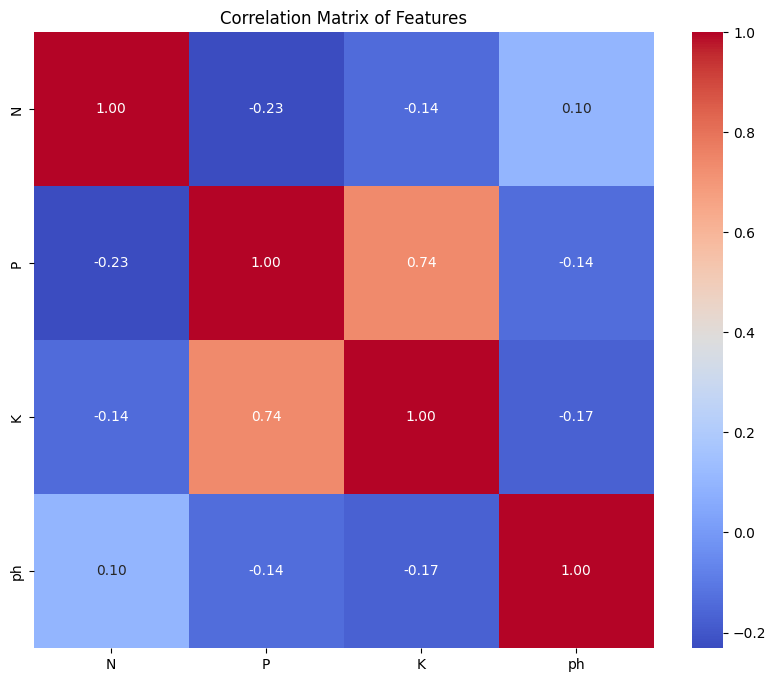

In [201]:
# Compute the correlation matrix
correlation_matrix = crops.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

As the output illustrates the relationships between the "P" and "K" variable is very strong. To solve the issue of the multicollinearity, here, we drop one of this column and then go through the traing steps again. 

In [202]:
X = X.drop('P', axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print(new_X.shape, y.shape)

(2200, 3) (2200,)


**Next:** Once you have your final features, train and test a new Logistic Regression model called log_reg, then evaluate performance using f1_score(), saving the metric as a variable called model_performance.

In [203]:
log_reg = LogisticRegression(max_iter=2000, multi_class='multinomial')
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_final = log_reg.predict(X_test)

# Evaluate the model performance using F1 score
model_performance = f1_score(y_test, y_pred_final, average='weighted')

print("Model Performance (F1 Score):", model_performance)

Model Performance (F1 Score): 0.558010495235685


Try changing the drop column from P to K, although the correlation between them is same, droping each of them affect the F1 score. That is probably because of the relation these two columns have with the other columns for which the P's correlation is more.